## REGRESSION

**Question** Do you remember what the regression is?

Today's analysis we will run on dataset 'car-mpg' which has the following columns: cylinders, displacement, horsepower, weight, acceleration, model year, origin and mpg. Mpg is decision attribute and stands for miles per gallon, which basically means the reverse of combustion (pl. spalanie). The dataset comes from https://archive.ics.uci.edu/ml/datasets/auto+mpg However, it does not have the original data, but normalized version.

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import f, f_oneway
import statsmodels.api as sm
from scipy import stats
%matplotlib inline
plt.style.use('ggplot')

In [59]:
data = pd.read_csv('car-mpg.csv', header=None)
data.head()

,0,1,2,3,4,5,6,7
0,1.0,0.617571,0.456522,0.536150,0.238095,0.0,0.0,18.0
1,1.0,0.728682,0.646739,0.589736,0.208333,0.0,0.0,15.0
2,1.0,0.645995,0.565217,0.516870,0.178571,0.0,0.0,18.0
3,1.0,0.609819,0.565217,0.516019,0.238095,0.0,0.0,16.0
4,1.0,0.604651,0.510870,0.520556,0.148810,0.0,0.0,17.0


As the first step of the task let's get to know with our data and its distribution.

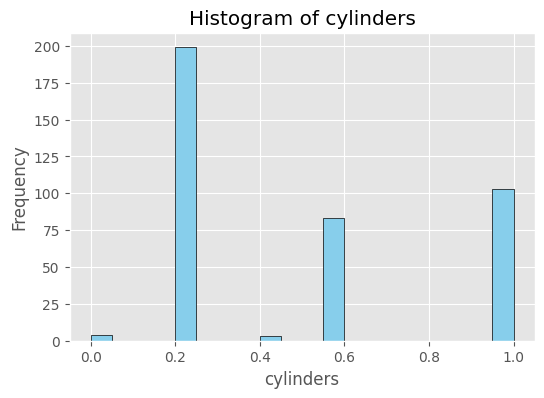

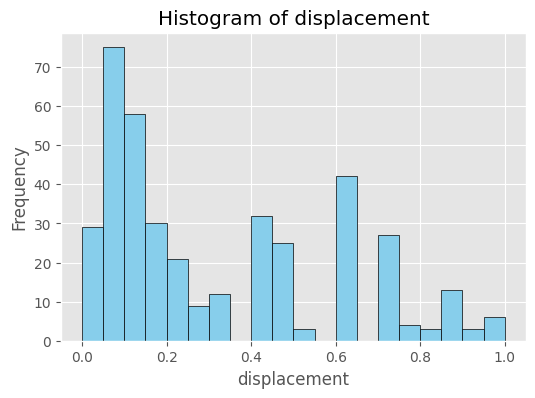

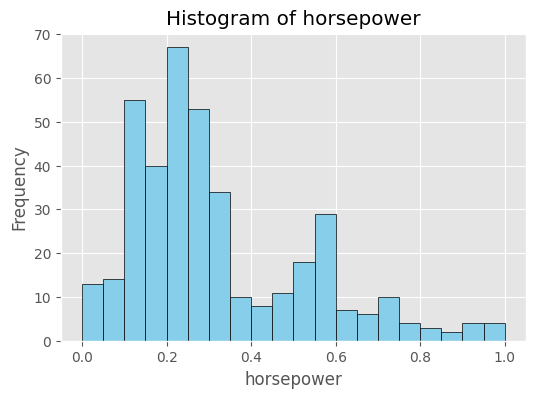

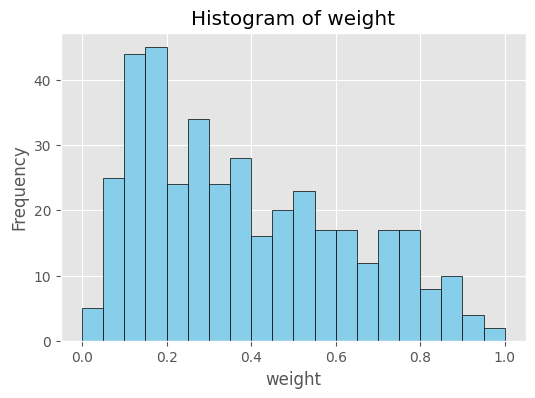

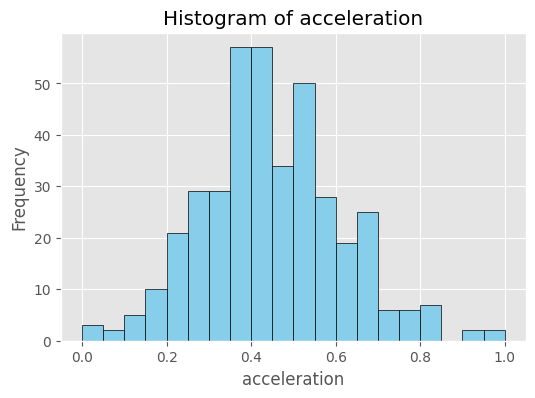

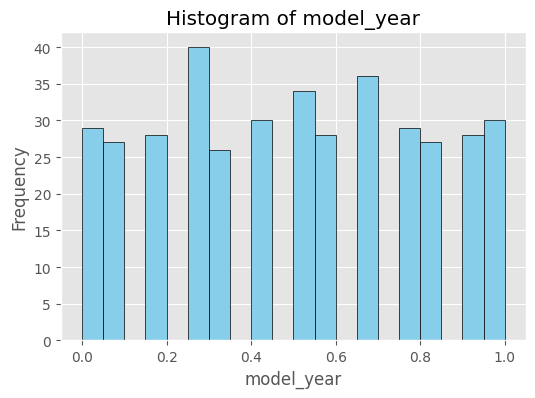

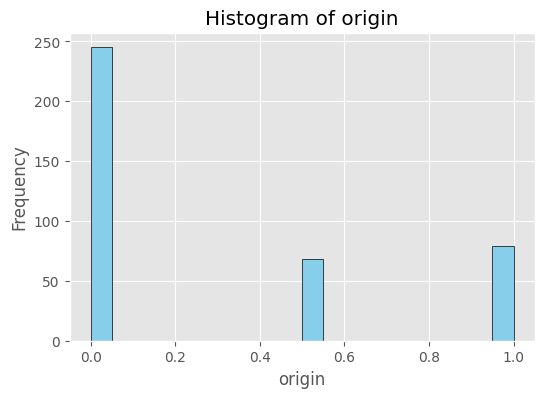

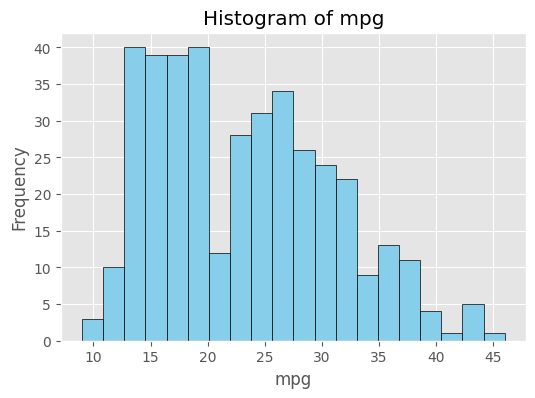

In [60]:
columns = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'mpg']
data.columns = columns

for col in columns:
    plt.figure(figsize=(6, 4))
    plt.hist(data[col].dropna(), bins=20, color='skyblue', edgecolor='black')
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


### SIMPLE LINEAR REGRESSION

**Task** Write your own function which calculates linear regression step by step and plot the results. <br/>
*Hint* If you do not remember how it was calculated, look here: https://en.wikipedia.org/wiki/Simple_linear_regression

In [61]:
def LinearRegressionOne(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    
    # Calculate the slope (a) and intercept (b)
    numerator = np.sum((x - x_mean) * (y - y_mean))
    denominator = np.sum((x - x_mean) ** 2)
    a = numerator / denominator
    b = y_mean - a * x_mean
    
    plt.scatter(x, y, color='blue', label='Data points')
    y_pred = a * x + b
    plt.plot(x, y_pred, color='red', label=f'Linear fit: y = {a:.2f}x + {b:.2f}')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Linear Regression Fit")
    plt.legend()
    plt.show()
    
    print(f"Slope (Coefficient): {a}")
    print(f"Intercept: {b}")
    return a, b

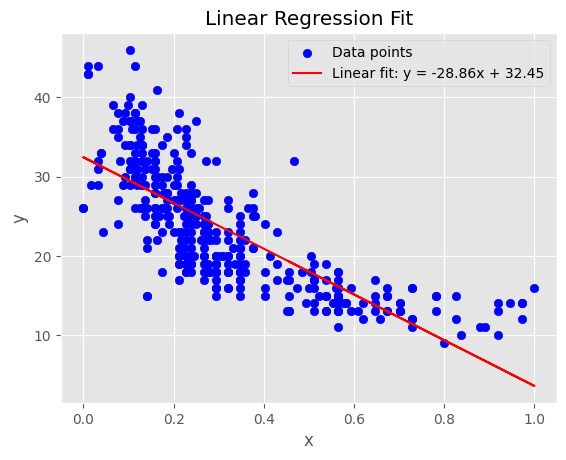

Slope (Coefficient): -28.860049132825637
Intercept: 32.45397418066428


In [62]:
slope, intercept = LinearRegressionOne(data['horsepower'], data['mpg'])

**Task** As you already wrote your own function which calculates simple linear regression, you can now use implementation from sklearn package. This time split your data to train and test set (use first 40 observations as test ones) and plot your results. Compare the results from your own implementation and this one from sklearn. Did you get similar coefficients for your linear function?

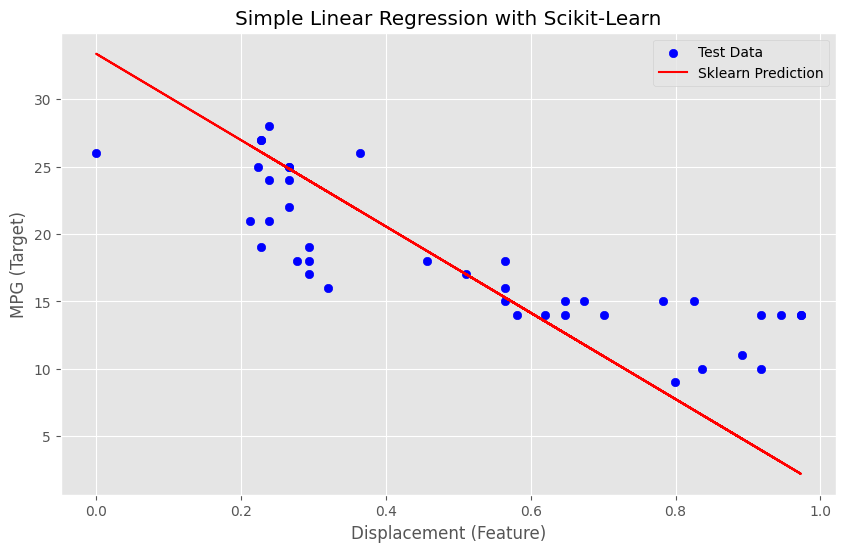

Slope (Coefficient): -32.022525329497306
Intercept: 33.371923519382015


In [63]:
def LinearRegressionOneScikit(x, y):
    # Reshape x to be 2D as required by scikit-learn if it's a single feature
    x = x.values.reshape(-1, 1)  # Reshape for sklearn compatibility
    y = y.values  # Ensure y is in the correct shape

    model = LinearRegression()
    model.fit(x[40:], y[40:])

    intercept = model.intercept_
    slope = model.coef_[0]
    y_pred = model.predict(x[:40])

    plt.figure(figsize=(10, 6))
    plt.scatter(x[:40], y[:40], color="blue", label="Test Data")
    plt.plot(x[:40], y_pred, color="red", label="Sklearn Prediction")
    plt.xlabel("Displacement (Feature)")
    plt.ylabel("MPG (Target)")
    plt.title("Simple Linear Regression with Scikit-Learn")
    plt.legend()
    plt.show()

    print(f"Slope (Coefficient): {slope}")
    print(f"Intercept: {intercept}")
    return slope, intercept

slope, intercept = LinearRegressionOneScikit(data['horsepower'], data['mpg'])

#### Polynomial regression

We do not have to limit to only simple line but we also can create some other shapes. Run the following codes:

c:\Users\Miki Nowak\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


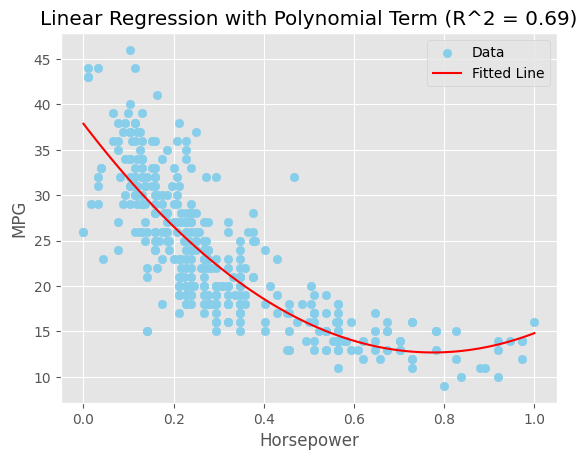

In [64]:
x = data[['horsepower']].copy()
y = data['mpg']

x['horsepower^2'] = x['horsepower'] ** 2

reg = linear_model.LinearRegression().fit(x, y)
score = reg.score(x, y)

x_line = np.linspace(x['horsepower'].min(), x['horsepower'].max(), 100)
x_line_poly = np.column_stack([x_line, x_line ** 2])  # Add squared term

y_line = reg.predict(x_line_poly)

plt.scatter(x['horsepower'], y, color="skyblue", label="Data")
plt.plot(x_line, y_line, color="red", label="Fitted Line")
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.title(f"Linear Regression with Polynomial Term (R^2 = {score:.2f})")
plt.legend()
plt.show()

c:\Users\Miki Nowak\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


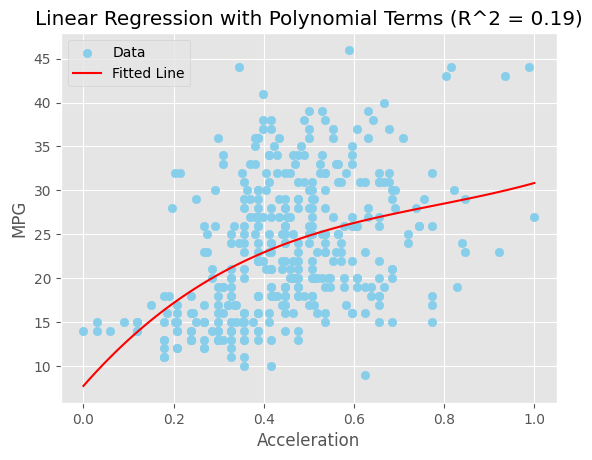

In [65]:
x = data[['acceleration']].copy()
y = data['mpg']

x['acceleration^2'] = x['acceleration'] ** 2
x['acceleration^3'] = x['acceleration'] ** 3

reg = linear_model.LinearRegression().fit(x, y)
score = reg.score(x, y)

x_line = np.linspace(x['acceleration'].min(), x['acceleration'].max(), 100)
x_line_poly = np.column_stack([x_line, x_line ** 2, x_line ** 3])  # Add squared and cubic terms

y_line = reg.predict(x_line_poly)

plt.scatter(x['acceleration'], y, color="skyblue", label="Data")
plt.plot(x_line, y_line, color="red", label="Fitted Line")
plt.xlabel("Acceleration")
plt.ylabel("MPG")
plt.title(f"Linear Regression with Polynomial Terms (R^2 = {score:.2f})")
plt.legend()
plt.show()

### MULTIPLE LINEAR REGRESSION

**Question** Do you remember how the multiple linear regression works? <br/>

#### GRADIENT DESCENT ALGORITHM
Gradient descent algorithm’s main objective is to minimise the cost function. It is one of the best optimisation algorithms to minimise errors (difference of actual value and predicted value). In a real world example, it is similar to find out a best direction to take a step downhill.

**Task** This time you are about to fill missing values in multiple linear regression implementation with the usage of batch gradient decent algorithm.

In [66]:
x = data.drop(columns=['mpg']).copy()
y = data[['mpg']]

x['intercept'] = 1 

n_iterations = 10000

learning_rate = 0.1

weights = np.zeros((x.shape[1], 1))

for _ in range(n_iterations):
    y_pred = np.dot(x, weights)
    residuals = y_pred - y
    gradient_vector = np.dot(x.T, residuals)
    weights -= learning_rate/x.shape[0] * gradient_vector

# last weight is the value of intercept 
print(weights)

[[ -2.27258104]
 [  6.93429115]
 [ -2.91154964]
 [-22.48697283]
 [  1.48254227]
 [  8.56640422]
 [  2.80872173]
 [ 26.02232035]]


**Task** You do not need to write your own implementation of multiple linear regression, you can also use sklearn implementation. This time your function should have params: independent variables *x* and dependent variable *y* and return (or just print) score and coefficients of the function (.coef_ and .intercept_).

In [67]:
def MultipleLinearRegression(x, y):
    model = LinearRegression()
    model.fit(x, y)
    
    coefficients = model.coef_
    intercept = model.intercept_
    score = model.score(x, y)
    
    print(f'Coefficients: {coefficients}')
    print(f'Intercept: {intercept}')
    print(f'R^2 Score: {score}')



MultipleLinearRegression(x, y)

Coefficients: [[ -2.63758008   7.99990787  -3.02421131 -22.97490448   1.63552668
    8.5886846    2.86000053   0.        ]]
Intercept: [25.98448797]
R^2 Score: 0.8180917738082362


**Question** Compare the results from two above methods. Are they similar?

## SIGNIFICANCE REGRESSION COEFFICIENT

We can statistically check if the model (or specific parameter) is significant.

#### GLOBAL

**Task** Implement global test for checking significance. Fill the following methods according to your knowledge from the lecture.

In [68]:
def getSSR(y, y_pred):
    y_mean = np.mean(y)
    return np.sum((y_pred - y_mean) ** 2)

def getSSE(y, y_pred):
    return np.sum((y - y_pred) ** 2)

def getF(y, y_pred, n, m):
    ssr = getSSR(y, y_pred)
    sse = getSSE(y, y_pred)
    
    msr = ssr / (m - 1)  # m is the number of predictors
    mse = sse / (n - m)  # n is the number of observations

    return msr / mse

def getSignificanceRegressionCoefficient(x, y):
    model = LinearRegression()
    model.fit(x, y)
    y_pred = model.predict(x)
    
    n = x.shape[0]
    m = x.shape[1] + 1  # +1 for the intercept

    F = getF(y, y_pred, n, m)
    p_value = 1 - stats.f.cdf(F, m - 1, n - m)

    return F, p_value


In [69]:
xx = data.iloc[:,:-1].values
yy = data.iloc[:,-1:].values[:,0]

In [70]:
F,p = getSignificanceRegressionCoefficient(xx,yy)
print(F)
if p < 0.05:
    print(" confirm " + str(p))
else:
    print(" reject " + str(p))

246.70779461475377
 confirm 1.1102230246251565e-16


Let's check the correctness of your function.

In [71]:
sm_stats = sm.OLS(yy, sm.add_constant(xx)).fit()
print(sm_stats.fvalue)

246.70779461475374


#### LOCAL

**Task** Now check the significance of each criterion. As the equation for global version is more general, we can use the function that was previously written.

In [72]:
def checkIndividualSignificance(x, y):
    # Ensure x is a DataFrame to access column names easily
    if isinstance(x, np.ndarray):
        x = pd.DataFrame(x, columns=[f"X{i+1}" for i in range(x.shape[1])])
    
    model = LinearRegression()
    model.fit(x, y)
    y_pred = model.predict(x)
    
    sse = getSSE(y, y_pred)
    mse = sse / (x.shape[0] - x.shape[1] - 1)
    
    # Standard errors for each coefficient
    x_with_intercept = np.hstack([np.ones((x.shape[0], 1)), x])
    cov_matrix = mse * np.linalg.inv(np.dot(x_with_intercept.T, x_with_intercept))
    std_errors = np.sqrt(np.diag(cov_matrix))
    
    # t-values and p-values for each coefficient
    t_values = model.coef_ / std_errors[1:]  # Exclude intercept error
    p_values = [2 * (1 - stats.t.cdf(np.abs(t), x.shape[0] - x.shape[1] - 1)) for t in t_values]
    
    print(f"{'Predictor':<15} {'Coefficient':>12} {'t-value':>10} {'p-value':>10}")
    for i, (coef, t_val, p_val) in enumerate(zip(model.coef_, t_values, p_values)):
        print(f"{x.columns[i]:<15} {coef:12.4f} {t_val:10.4f} {p_val:10.4f}")

    return model.coef_, p_values

xx = data.iloc[:, :-1]
yy = data.iloc[:, -1].values
coefficients, p_values = checkIndividualSignificance(xx, yy)


Predictor        Coefficient    t-value    p-value
cylinders            -2.6376    -1.6285     0.1042
displacement          7.9999     2.7466     0.0063
horsepower           -3.0242    -1.2120     0.2263
weight              -22.9749   -10.0550     0.0000
acceleration          1.6355     1.0013     0.3173
model_year            8.5887    14.0235     0.0000
origin                2.8600     5.1324     0.0000


## OUTLIERS

**Question** What is an outlier?

Let's look at the boxplot below. The points which are at the top and bottom of chart are outliers.

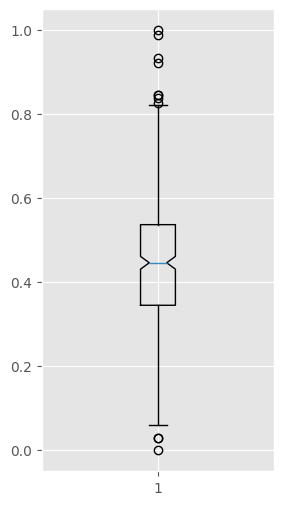

In [73]:
fig, ax1 = plt.subplots(figsize=(3, 6))
plt.boxplot(data.iloc[:, 4], 1)
plt.show()

The method that is used in this type of charts to determine outliers bases on quartiles. Firstly, we need to calculate IQR which stands for interquartile range and is the difference between the third and the first quartile. Usually stating the limit of whiskers is: [Q1-IQR * 1.5, Q3 + IQR * 1.5]. All values that are outside this range are treated as outliers. It is connected with normal distribution and distance greater than 3 std dev.

However, this method cannot cope correctly with multidimensional data. There can be outliers that are still close to median but overall are far from other points. 

We will use *statsmodel* package which calculates a few interesting measures.

In [74]:
data.columns = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'mpg']

model = sm.OLS(data.iloc[:,-1], data.iloc[:,:-1])
results = model.fit()
influence = results.get_influence()
sm_fr = influence.summary_frame()
sm_fr

,dfb_cylinders,dfb_displacement,dfb_horsepower,dfb_weight,dfb_acceleration,dfb_model_year,dfb_origin,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,0.149282,-0.021409,-0.031690,-0.061572,0.012817,-0.079705,0.021783,0.007391,1.689373,0.017805,0.227457,1.693466,0.228009
1,0.009129,0.009879,0.016853,-0.028737,0.010857,-0.014861,-0.000579,0.000353,0.367664,0.017946,0.049701,0.367251,0.049645
2,0.095248,-0.012133,0.047838,-0.093244,0.021120,-0.046328,-0.008468,0.004310,1.229393,0.019572,0.173699,1.230213,0.173814
3,0.047541,-0.018843,0.026841,-0.034825,0.013350,-0.023969,-0.011712,0.000775,0.492683,0.021861,0.073655,0.492198,0.073582
4,0.166939,-0.060634,0.027323,-0.070768,-0.011399,-0.058356,0.001045,0.007476,1.640072,0.019084,0.228762,1.643693,0.229267
...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,-0.020033,-0.000269,0.006696,0.012212,-0.006055,0.034577,-0.019155,0.000349,0.362243,0.018269,0.049415,0.361834,0.049359
388,0.006583,-0.020696,0.008191,0.025776,-0.044878,-0.005101,0.011007,0.000600,-0.415262,0.023779,-0.064811,-0.414815,-0.064741
389,-0.058754,0.029140,0.068237,-0.045877,-0.084620,0.262453,-0.087121,0.011348,1.941096,0.020648,0.281847,1.948130,0.282868
390,0.019040,0.009695,-0.021770,-0.004832,-0.019809,-0.043734,0.051242,0.001008,-0.634682,0.017219,-0.084011,-0.634189,-0.083946


**Task** Visualize residuals (*standard_resid*) with the usage of scatterplot. Draw also horizontal line on y-value = 0. Look at the chart. Are these values in a narrow row on y-value or you can identify that there are some outliers?

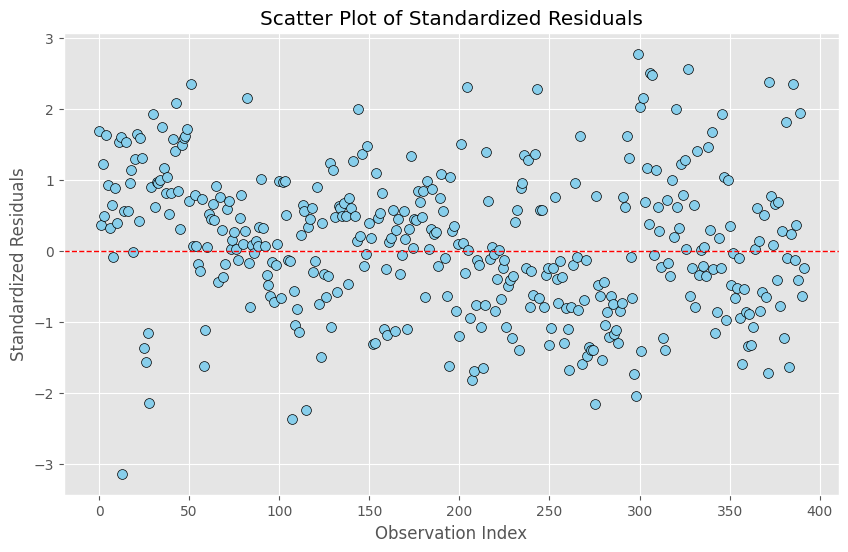

In [75]:
standard_residuals = sm_fr['standard_resid']

plt.figure(figsize=(10, 6))
plt.scatter(range(len(standard_residuals)), standard_residuals, color="skyblue", edgecolor="k", s=50)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.xlabel("Observation Index")
plt.ylabel("Standardized Residuals")
plt.title("Scatter Plot of Standardized Residuals")
plt.show()

#### DFFITS

This measure calculates the influence of i-th example on our regression equation by omitting this observation and comparing this model to previous one. Boundary values for our influential observations are +/- 2 * sqrt(1/number of observations)

**Task** Draw a plot where you visualise values of dffits as vertical lines (see: plt.vlines()) and horizontal lines (plt.axhline()) equal to boundaries of influential observations.

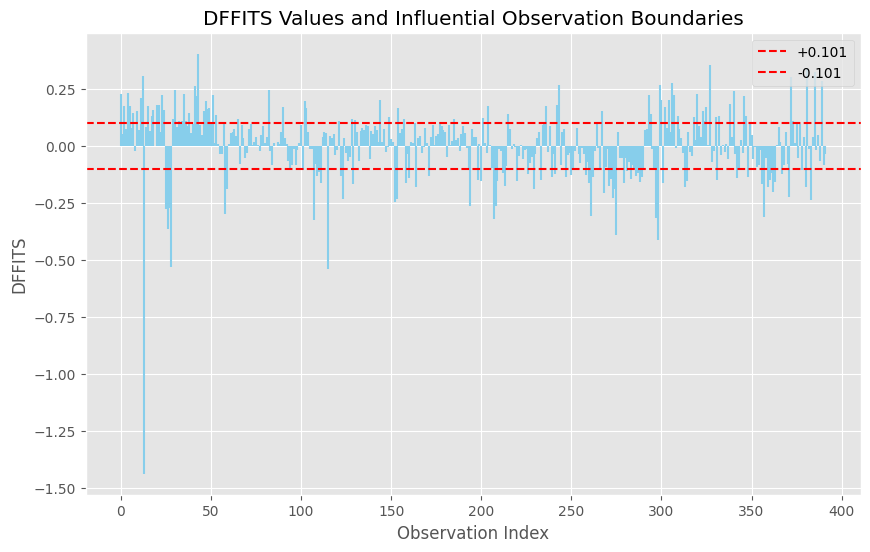

In [76]:
dffits = influence.dffits[0]

n = len(data)
boundary = 2 * np.sqrt(1 / n)

plt.figure(figsize=(10, 6))
plt.vlines(x=range(n), ymin=0, ymax=dffits, color="skyblue", linewidth=1.5)
plt.axhline(y=boundary, color="red", linestyle="--", label=f"+{boundary:.3f}")  # Upper boundary
plt.axhline(y=-boundary, color="red", linestyle="--", label=f"-{boundary:.3f}")  # Lower boundary
plt.xlabel("Observation Index")
plt.ylabel("DFFITS")
plt.title("DFFITS Values and Influential Observation Boundaries")
plt.legend()
plt.show()

**Task** Get indices of those observations that are influential for diffits.

In [77]:
influential_indices_dffits = np.where(np.abs(dffits) > boundary)[0]

print("Indices of influential observations:", influential_indices_dffits)

Indices of influential observations: [  0   2   4   5   7   9  11  12  13  15  17  18  20  21  23  24  25  26
  27  28  29  30  32  34  35  36  38  41  42  43  46  47  48  49  50  51
  53  57  58  59  65  82  90  94 101 102 103 107 109 110 111 115 121 122
 123 128 129 130 144 149 152 153 154 157 158 160 164 171 177 185 193 194
 198 200 201 204 207 208 209 212 213 215 220 226 229 233 236 239 241 242
 243 247 250 251 258 260 261 262 267 268 271 272 273 274 275 279 281 283
 285 286 287 288 289 293 294 297 298 299 300 301 302 304 306 307 309 313
 314 318 320 323 324 325 327 330 331 332 338 340 342 343 346 347 348 356
 357 359 360 361 362 363 367 371 372 373 378 380 381 383 385 389]


#### COOK'S DISTANCE

Comparing to the previous, there is also made checking the influence of each observation. However, this time we check the difference of coefficients in our regression equation while we omit the i-th observation. The boundary of the influence is very often set to 4/number of observations.

**Task** Once again draw a plot where you visualise values of cooks_d as vertical lines and horizontal line equal to boundary of influential observations. *Tip* It might be useful to visualize square root of the values to make the chart more transparent.

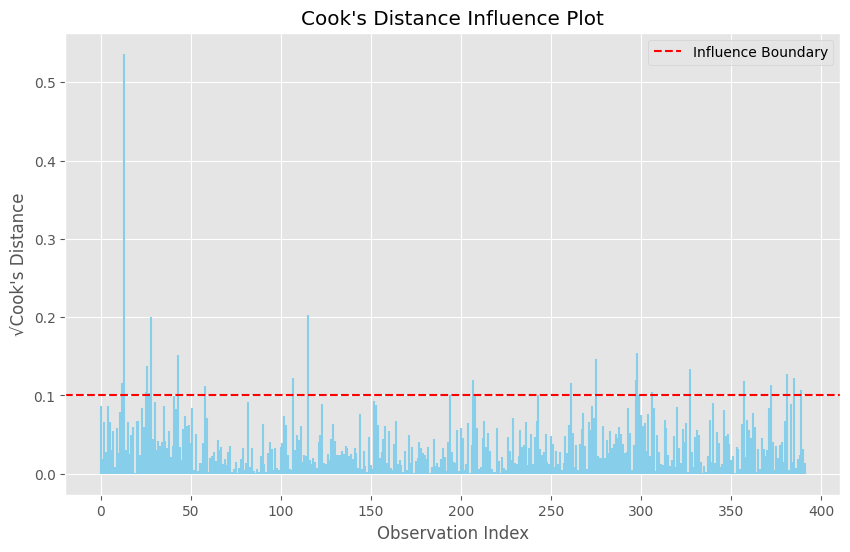

In [78]:
cooks_d = influence.cooks_distance[0]

boundary = 4 / n

plt.figure(figsize=(10, 6))
plt.vlines(range(len(cooks_d)), ymin=0, ymax=np.sqrt(cooks_d), color="skyblue")
plt.axhline(y=np.sqrt(boundary), color="red", linestyle="--", label="Influence Boundary")
plt.xlabel("Observation Index")
plt.ylabel("√Cook's Distance")
plt.title("Cook's Distance Influence Plot")
plt.legend()
plt.show()

**Task** Get indices of those observations that are influential for Cook's distance.

In [79]:
influential_indices_cooks = np.where(cooks_d > boundary)[0]

print("Indices of influential observations based on Cook's Distance:", influential_indices_cooks)

Indices of influential observations based on Cook's Distance: [ 12  13  25  26  27  28  43  58 107 115 207 261 275 297 298 306 327 357
 372 381 385 389]


**Task** Check if there are elements that appear on both lists. Maybe one list is subset of the second?

In [80]:
influential_dffits_set = set(influential_indices_dffits)
influential_cooks_set = set(influential_indices_cooks)

common_elements = influential_dffits_set.intersection(influential_cooks_set)
print("Common influential observations in both DFFITS and Cook's Distance:", common_elements)

is_dffits_subset_of_cooks = influential_dffits_set.issubset(influential_cooks_set)
print("Is DFFITS subset of Cook's Distance?", is_dffits_subset_of_cooks)

is_cooks_subset_of_dffits = influential_cooks_set.issubset(influential_dffits_set)
print("Is Cook's Distance subset of DFFITS?", is_cooks_subset_of_dffits)


Common influential observations in both DFFITS and Cook's Distance: {385, 261, 389, 12, 13, 275, 25, 26, 27, 28, 297, 298, 43, 306, 58, 327, 207, 357, 107, 115, 372, 381}
Is DFFITS subset of Cook's Distance? False
Is Cook's Distance subset of DFFITS? True
